## **Import Library**

In [ ]:
!pip install scikit-image

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from skimage.transform import resize
from skimage.color import rgb2gray
from skimage.io import imread

## **Download Gambar Dataset Dan Unzip**

In [1]:
!wget http://weegee.vision.ucmerced.edu/datasets/UCMerced_LandUse.zip

--2022-03-14 16:39:31--  http://weegee.vision.ucmerced.edu/datasets/UCMerced_LandUse.zip
Resolving weegee.vision.ucmerced.edu (weegee.vision.ucmerced.edu)... 169.236.184.65
Connecting to weegee.vision.ucmerced.edu (weegee.vision.ucmerced.edu)|169.236.184.65|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 332468434 (317M) [application/zip]
Saving to: ‘UCMerced_LandUse.zip’

UCMerced_LandUse.zi 100%[===================>] 317.07M  9.40MB/s    in 69s     

2022-03-14 16:40:42 (4.61 MB/s) - ‘UCMerced_LandUse.zip’ saved [332468434/332468434]



In [ ]:
import zipfile

with zipfile.ZipFile("UCMerced_LandUse.zip", 'r') as zip_ref:
     zip_ref.extractall("dataset")

## **Preprocessing Gambar**

In [103]:
def make_dataset(directory):
    target = []
    flat_data = []
    images = []

    DataDirectory = directory
    Categories = ['buildings', 'parkinglot', 'harbor', 'forest', 'runway']
    
    for i in Categories:
      print("Kategori:", i, "\t\tLabel :", Categories.index(i))

      target_class = Categories.index(i)
      path = os.path.join(DataDirectory, i)

      for img in os.listdir(path):
        if img != '.ipynb_checkpoints':
            img_array = imread(os.path.join(path, img))
            img_resized = resize(img_array, (224, 224, 3))

            flat_data.append(img_resized.flatten())

            images.append(img_resized)
            target.append(target_class)


    flat_data = np.array(flat_data)

    images = np.array(images)
    target = np.array(target)
    
    df = pd.DataFrame(flat_data)
    df['Target'] = target
    
    return df

In [104]:
df = make_dataset("dataset/UCMerced_LandUse/Images")
df

Kategori: buildings 		Label : 0
Kategori: parkinglot 		Label : 1
Kategori: harbor 		Label : 2
Kategori: forest 		Label : 3
Kategori: runway 		Label : 4


,0,1,2,3,4,5,6,7,8,9,...,150519,150520,150521,150522,150523,150524,150525,150526,150527,Target
0,0.191016,0.233874,0.257143,0.178331,0.217547,0.237435,0.178231,0.217447,0.238635,0.185994,...,0.326691,0.372689,0.317927,0.145438,0.173349,0.157203,0.099800,0.116106,0.115446,0
1,0.335054,0.358303,0.297539,0.336014,0.355622,0.270748,0.359284,0.381593,0.280572,0.391877,...,0.620068,0.542177,0.440316,0.627891,0.550300,0.448339,0.595818,0.521869,0.419908,0
2,0.881253,0.880792,0.873389,0.754262,0.747979,0.748299,0.752301,0.740156,0.712605,0.799440,...,0.107203,0.124210,0.152581,0.115586,0.194798,0.163645,0.117667,0.208143,0.152501,0
3,0.157403,0.157143,0.160504,0.160784,0.157923,0.157043,0.160784,0.159384,0.159204,0.160784,...,0.368868,0.363926,0.280672,0.451120,0.448539,0.309824,0.469968,0.484794,0.340436,0
4,0.220948,0.217007,0.223209,0.275410,0.265166,0.255702,0.387055,0.363806,0.346799,0.386134,...,0.718627,0.695198,0.646078,0.611965,0.592417,0.528932,0.585454,0.558824,0.509324,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.623069,0.521629,0.419408,0.649960,0.558043,0.445138,0.679132,0.595538,0.478812,0.649020,...,0.740556,0.655222,0.576891,0.738375,0.652881,0.574670,0.737275,0.651000,0.575970,4
496,0.637895,0.554722,0.467227,0.661925,0.570948,0.497439,0.663405,0.576271,0.497499,0.649860,...,0.420008,0.355862,0.300860,0.423309,0.359444,0.301461,0.451020,0.388515,0.335934,4
497,0.282313,0.266607,0.305842,0.283713,0.267807,0.307243,0.285354,0.268367,0.308884,0.282633,...,0.287755,0.279912,0.319128,0.285034,0.277191,0.316407,0.275150,0.267307,0.306523,4
498,0.766927,0.745738,0.664186,0.764786,0.716527,0.642697,0.742837,0.688015,0.616807,0.728571,...,0.371609,0.392517,0.319108,0.385614,0.395758,0.333193,0.379092,0.383533,0.328111,4


## **Train Test Split Dataset**

In [105]:
from sklearn.model_selection import train_test_split

x = df.iloc[:,:-1].values
y = df.Target

x_train, x_test, y_train, y_test = train_test_split(x,y,shuffle=True,test_size = 0.2, random_state=42, stratify=y)

print("Dimensi training data       :", x_train.shape)
print("Dimensi output training data:", y_train.shape)

print("Dimensi input testing data  :", x_test.shape)
print("Dimensi output testing data :", y_test.shape)

Dimensi training data       : (400, 150528)
Dimensi output training data: (400,)
Dimensi input testing data  : (100, 150528)
Dimensi output testing data : (100,)


## **Training Model**

In [106]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=10, random_state=0)
clf.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, random_state=0)

## **Evaluasi Model**

In [107]:
y_prediction = clf.predict(x_test)

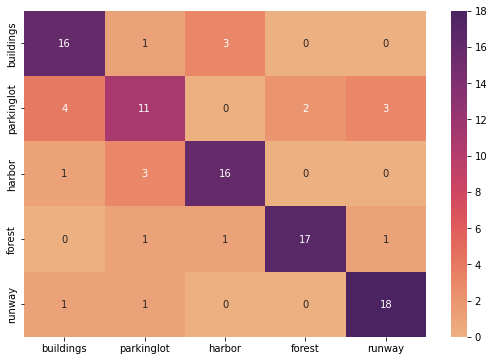


               precision    recall  f1-score   support

           0       0.80      0.73      0.76        22
           1       0.55      0.65      0.59        17
           2       0.80      0.80      0.80        20
           3       0.85      0.89      0.87        19
           4       0.90      0.82      0.86        22

    accuracy                           0.78       100
   macro avg       0.78      0.78      0.78       100
weighted avg       0.79      0.78      0.78       100



In [110]:
conf_matrix = confusion_matrix(y_test, y_prediction)

plt.figure(figsize=(9, 6))

sns.heatmap(
    conf_matrix, 
    annot=True, 
    xticklabels=['buildings', 'parkinglot', 'harbor', 'forest', 'runway'], 
    yticklabels=['buildings', 'parkinglot', 'harbor', 'forest', 'runway'], 
    cmap='flare', fmt='d'
)

plt.show()

print("\n", classification_report(y_prediction, y_test))